# Ejercicio 1.5.5

Resuelve el siguiente problema de decisión multiobjetivo y describe el frente de pareto.

$$
    \min f_1(x,y) = 2x^{2} - 5y + y^{2} \\
    \max f_2(x,y) = x^{2} + 14x + 5y -74
$$

$$
    x + y \geq 15, \\
    x - y \leq 5, \\
    2x + y \geq 20, \\
    0 \leq x \leq 20, \\
    0 \leq y \leq 20
$$

In [2]:
import numpy as np
from typing import Union
import matplotlib.pyplot as plt

# Definimos las funciones del problema
def f1(
    x: Union[float, np.ndarray], 
    y: Union[float, np.ndarray]
    ) -> Union[float, np.ndarray]:
    
    X,Y = np.meshgrid(x, y)
    return 2*X**2 - 5*Y + Y**2

def f2(
    x: Union[float, np.ndarray], 
    y: Union[float, np.ndarray]
    ) -> Union[float, np.ndarray]:
    
    X,Y = np.meshgrid(x, y)
    return X**2 + 14*X + 5*Y - 74

# Definimos la superficie del problema
def mask(
    x: Union[float, np.ndarray],
    y: Union[float, np.ndarray]
    ) -> Union[bool, np.ndarray]:
    
    X, Y = np.meshgrid(x, y)
    
    mask1 = X + Y >= 15
    mask2 = X - Y <= 5
    mask3 = 2*X + Y >= 20
    mask4_1 = X >= 0
    mask4_2 = X <= 20
    mask5_1 = Y >= 0
    mask5_2 = Y <= 20
    
    return (mask1 & mask2 & mask3 & mask4_1 & mask4_2 & mask5_1 & mask5_2) * 1

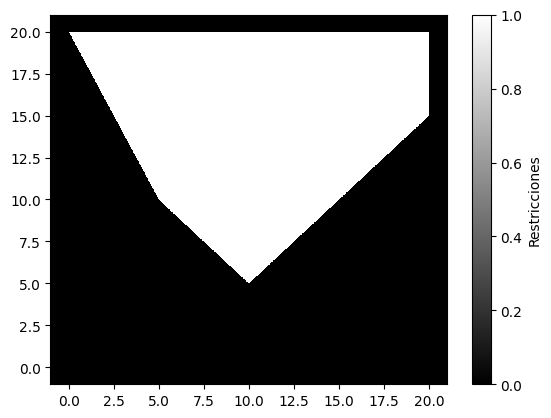

In [3]:
# Representamos la superficie del problema

N = 1000
x = np.linspace(-1, 21, N)
y = np.linspace(-1, 21, N)

plt.pcolormesh(x, y, mask(x, y), shading='auto', cmap='grey')
plt.colorbar(label='Restricciones')
plt.show()

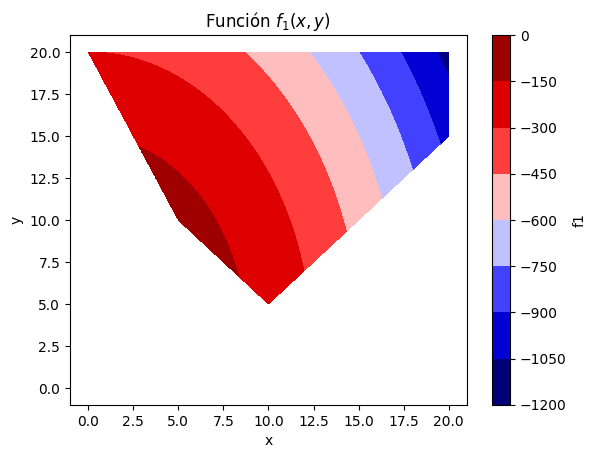

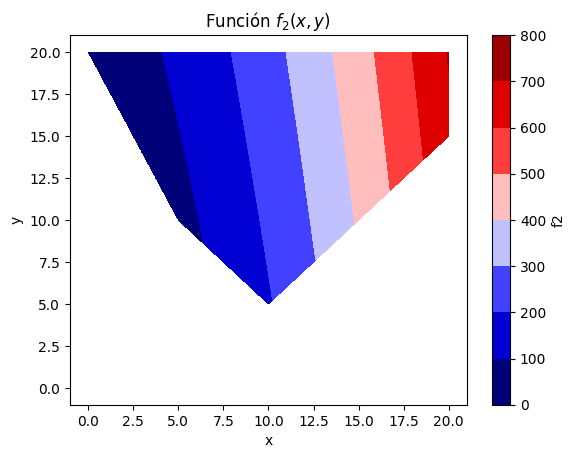

In [4]:
# Vemos el valor que toma cada función en la superficie del problema

###################
# Representamos f1
###################

# Calculamos el valor de f1
mask_f1 = mask(x, y)
f1_values = f1(x, y)
f1_values[mask_f1 == 0] = np.nan

# Representamos f1
plt.title("Función $f_1(x,y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.contourf(x, y, -f1_values, cmap="seismic")
plt.colorbar(label='f1')
plt.show()


###################
# Representamos f2
###################

# Calculamos el valor de f2
mask_f2 = mask(x, y)
f2_values = f2(x, y)
f2_values[mask_f2 == 0] = np.nan

# Representamos f2
plt.title("Función $f_2(x,y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.contourf(x, y, f2_values, cmap="seismic")
plt.colorbar(label='f2')
plt.show()

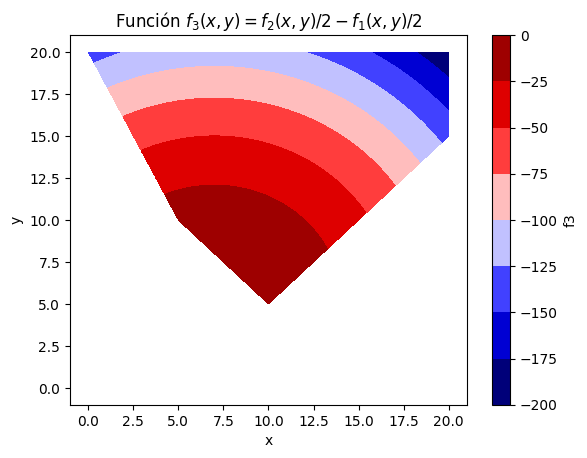

In [5]:
# Creamos una función conjunto entre f1 y f2 que sea  f2 - f1
def f3(
    x: Union[float, np.ndarray], 
    y: Union[float, np.ndarray]
    ) -> Union[float, np.ndarray]:
    
    f1_values = f1(x, y)
    f2_values = f2(x, y)
    
    return (f2_values - f1_values) / 2

# Calculamos el valor de f3
mask_f3 = mask(x, y)
f3_values = f3(x, y)
f3_values[mask_f3 == 0] = np.nan

# Representamos f3
plt.title("Función $f_3(x,y) = f_2(x,y)/2 - f_1(x,y)/2$")
plt.xlabel("x")
plt.ylabel("y")
plt.contourf(x, y, f3_values, cmap="seismic")
plt.colorbar(label='f3')
plt.show()

In [6]:
# Encontramos el punto (x,y) que maximiza f3
# Encontramos el índice del valor máximo de f3 ignorando los NaN
max_index = np.nanargmax(f3_values)
i, j = np.unravel_index(max_index, f3_values.shape)

# Recordando que en el meshgrid, x corresponde al segundo eje y y corresponde al primero
x_opt = x[j]
y_opt = y[i]

print("Las coordenadas que maximizan f3 son: x =", x_opt, ", y =", y_opt)

Las coordenadas que maximizan f3 son: x = 8.491491491491491 , y = 6.50950950950951
